# EDA Report - COVID-19

## 1. Summary

- This code-notebook documents the exploratory data analysis (EDA) carried out on the `Data on COVID-19 (coronavirus) by Our World in Data` by Group 24.
- The dataset can be found at [owid-covid-codebook](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).
- We've followed the following EDA checklist as found in Chapter 4 of `The Art of Data Science` by `Peng and Matsui`. 

| S.No. | EDA Item                                        | Section              |
|-------|-------------------------------------------------|----------------------|
| 1.    | Formulate your question                         | Refer to section 4.1 |
| 2.    | Read in your data                               | Refer to section 4.2 |
| 3.    | Check the packaging                             | Refer to section 4.3 |
| 4.    | Look at the top and the bottom of your data     | Refer to section 4.4 |
| 5.    | Check your “n”s                                 | Refer to section 4.5 |
| 6.    | Validate with at least one external data source | Refer to section 4.6 |
| 7.    | Make a plot                                     | Refer to section 4.7 |
| 8.    | Try the easy solution first                     | Refer to section 4.8 |
| 9.    | Follow up                                       | Refer to section 4.9 |
**Table 1. EDA Checklist.**

## 2. Assumptions
- The dataset is updated daily, however, we've decided to consider `2020-10-31` as the cut-off date for our analyses.
- We've considered the start date for `Canada` and `USA` to be `2020-03-12` and `2020-03-01` respectively as explained in the Observations section below.
- There were three dates with zero new cases in Canada in the time-frame of analysis which were removed during calculations.

## 3. Observations

- The table shows the dates for the first case and the first test as documented in the dataset for both Canada and USA. 

| Country | First New Case | First New Test |
|---------|----------------|----------------|
| Canada  | 2020-01-26     | 2020-03-12*    |
| USA     | 2020-01-21     | 2020-03-01     |
**Table 2. First new case and test dates.**

- *The first entry date for a New Test in Canada is 2020-03-12 however there were already 11023 tests conducted in Canada as of 2020-03-11, which is the first non-zero entry date for total-tests.

- We define `Response Ratio` as the proportion of `new_tests` to `new_cases`.

- The summary statistics for the daily `Response Ratio` as observed through EDA are captured in the following table.

| Country | count(n) |  mean | median |   std |     var |
|--------:|---------:|------:|-------:|------:|--------:|
|  Canada |      227 | 71.23 |  51.12 | 64.47 | 4157.19 |
|     USA |      245 | 17.82 |  16.61 |  8.48 |   71.92 |
**Table 3. Summary results for daily Response Ratio based on EDA.**

## 4. Exploratory Data Analysis (EDA)

In [17]:
import pandas as pd
import numpy as np
import altair as alt
from pandas_profiling import ProfileReport
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

### 4.1 Formulating the question.

> A hypothesis test with the following null and alternate hypotheses,
>
> H0: The ratio of daily COVID-19 tests conducted to daily new COVID-19 cases in Canada and USA is the same. 
>
> HA: The ratio of daily COVID-19 tests conducted to daily new COVID-19 cases in Canada and USA is not the same.

### 4.2 Reading the data.

In [2]:
covid = pd.read_csv("../data/owid-covid-data.csv")

### 4.3 Check the packaging.

In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57606 entries, 0 to 57605
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57282 non-null  object 
 1   continent                           56958 non-null  object 
 2   location                            57606 non-null  object 
 3   date                                57606 non-null  object 
 4   total_cases                         53972 non-null  float64
 5   new_cases                           56683 non-null  float64
 6   new_cases_smoothed                  55870 non-null  float64
 7   total_deaths                        44566 non-null  float64
 8   new_deaths                          56683 non-null  float64
 9   new_deaths_smoothed                 55870 non-null  float64
 10  total_cases_per_million             53684 non-null  float64
 11  new_cases_per_million               56619

#### Note: We also analyzed a Pandas profile report to better understand the data, the report is saved as an html file.

In [4]:
# covid_profile = ProfileReport(covid, title="Pandas Profiling Report for Our World in Data Covid dataset")
# covid_profile

# covid_profile.to_file("EDA-pandas-profile-report-COVID-19.html")

### 4.4 Look at the top and the bottom of your data

In [5]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [6]:
covid.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
57601,NaN,NaN,International,2020-11-14,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57602,NaN,NaN,International,2020-11-15,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57603,NaN,NaN,International,2020-11-16,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57604,NaN,NaN,International,2020-11-17,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57605,NaN,NaN,International,2020-11-18,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4.5 Check your “n”s.

In [7]:
covid.describe(include = np.number)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.397200e+04,56683.000000,55870.000000,4.456600e+04,56683.000000,55870.000000,53684.000000,56619.000000,55805.000000,44293.000000,...,50550.000000,33692.000000,51199.000000,53074.000000,39808.000000,39300.000000,24271.000000,46100.000000,56544.000000,49426.000000
mean,1.692058e+05,1966.828608,1934.441178,6.888751e+03,47.257555,46.985154,3169.518546,39.662585,38.782139,95.838308,...,20617.460538,12.441342,252.688286,8.070977,10.742060,32.641311,52.082517,3.089547,73.936374,0.722185
std,1.707895e+06,18415.729973,17934.741991,5.603876e+04,392.824312,379.644228,6243.543635,134.423758,102.472380,181.325571,...,20310.137119,19.432017,117.523597,4.191216,10.470905,13.453989,31.645808,2.512960,7.397755,0.153282
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.810000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,90.901000,0.000000,0.261000,4.000000,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.087000e+03,14.000000,19.429000,8.500000e+01,0.000000,0.286000,599.623000,2.204000,3.877000,20.383000,...,13913.839000,2.000000,238.339000,7.125000,6.400000,31.400000,52.232000,2.500000,75.290000,0.752000
75%,2.259700e+04,238.000000,247.286000,7.320000e+02,4.000000,4.143000,3514.404250,26.221000,29.823000,91.835000,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,5.574395e+07,647529.000000,589632.429000,1.339436e+06,10608.000000,9140.286000,77020.643000,8652.658000,2472.188000,1265.529000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [8]:
covid.describe(exclude = np.number)

,iso_code,continent,location,date,tests_units
count,57282,56958,57606,57606,25858
unique,215,6,216,324,6
top,QAT,Europe,Oman,2020-11-15,tests performed
freq,324,14883,324,215,15119


### 4.5.1 Analysing the columns of interest as per our formulated question.

In [9]:
col_list = ["iso_code", "date", "new_cases", "new_tests"]
covid = covid[col_list]

In [10]:
covid.query("iso_code == 'USA' and  new_tests > 0 and date <= '2020-10-31'").reset_index(drop=True)

,iso_code,date,new_cases,new_tests
0,USA,2020-03-01,3.0,183.0
1,USA,2020-03-02,20.0,455.0
2,USA,2020-03-03,14.0,806.0
3,USA,2020-03-04,22.0,901.0
4,USA,2020-03-05,34.0,1150.0
...,...,...,...,...
240,USA,2020-10-27,68359.0,1229458.0
241,USA,2020-10-28,75129.0,1355447.0
242,USA,2020-10-29,78371.0,1366664.0
243,USA,2020-10-30,88130.0,1414156.0


In [11]:
covid.query("iso_code == 'CAN' and  new_tests > 0 and date <= '2020-10-31'").reset_index(drop=True)

,iso_code,date,new_cases,new_tests
0,CAN,2020-03-12,10.0,4162.0
1,CAN,2020-03-15,68.0,2568.0
2,CAN,2020-03-16,60.0,12753.0
3,CAN,2020-03-17,120.0,6446.0
4,CAN,2020-03-18,145.0,9370.0
...,...,...,...,...
225,CAN,2020-10-27,4109.0,80889.0
226,CAN,2020-10-28,2674.0,55672.0
227,CAN,2020-10-29,2699.0,63142.0
228,CAN,2020-10-30,2956.0,62843.0


In [12]:
covid_US_CAN = covid.query("iso_code == 'CAN' or iso_code == 'USA' ").reset_index(drop=True)
covid_US_CAN = covid_US_CAN.query("new_tests > 0 and date >= '2020-03-01' and date <= '2020-10-31'").reset_index(drop=True)
covid_US_CAN = covid_US_CAN[covid_US_CAN.new_cases != 0]
covid_US_CAN["response_ratio"] = covid_US_CAN["new_tests"] / covid_US_CAN["new_cases"]
covid_US_CAN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 0 to 474
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   iso_code        472 non-null    object 
 1   date            472 non-null    object 
 2   new_cases       472 non-null    float64
 3   new_tests       472 non-null    float64
 4   response_ratio  472 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.1+ KB


### 4.6 Validate with at least one external data source

- We referenced another data set, [COVID-19 Community Mobility Reports](https://www.google.com/covid19/mobility/) and the data seemed to agree.

### 4.7 Make a plot.

In [13]:
covid_US_CAN['month'] = pd.DatetimeIndex(covid_US_CAN['date']).month

lookup = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:'December'}

covid_US_CAN['month'] = covid_US_CAN.apply(lambda row: lookup[row.month], axis = 1)

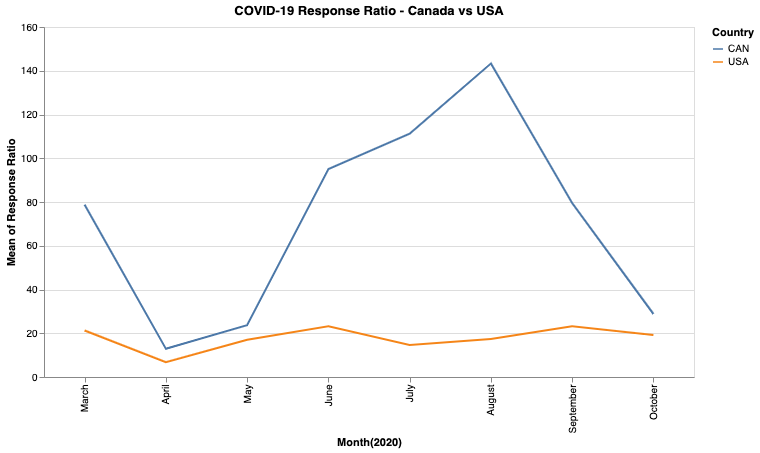

In [14]:
(alt.Chart(covid_US_CAN, title="COVID-19 Response Ratio - Canada vs USA").mark_line().encode(
    alt.X("month", sort = list(lookup.values()), title = "Month(2020)"),
    alt.Y("mean(response_ratio)",title = "Mean of Response Ratio"),
    color = alt.Color ("iso_code", legend=alt.Legend(title = "Country"))
)).properties(height = 350, width = 650)

#### Observation: We can see that the response ratio for USA is higher than for Canada for most of time in our considered time-range (March - October 2020).

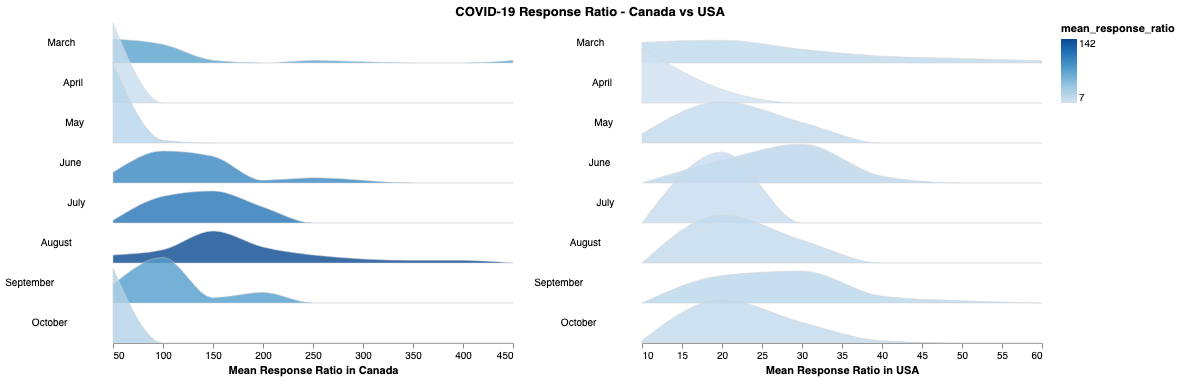

In [15]:
USA = covid_US_CAN.query("iso_code == 'USA' and  new_tests > 0 and date <= '2020-10-31'").reset_index(drop=True)

CAN = covid_US_CAN.query("iso_code == 'CAN' and  new_tests > 0 and date <= '2020-10-31'").reset_index(drop=True)

#removing the first date in March for the ridge plot to exclude February showing up
#to have a better comparison and aesthetic symmetry
USA = USA.query("date > '2020-03-01'")

def create_ridgeline_plot(dataset, title):
    step = 40
    overlap = 1

    ridgeline_plt = alt.Chart(dataset, height=step).transform_timeunit(
        Month='month(date)'
    ).transform_joinaggregate(
        mean_response_ratio='mean(response_ratio)', groupby=['Month']
    ).transform_bin(
        ['bin_max', 'bin_min'], 'response_ratio'
    ).transform_aggregate(
        value='count()', groupby=['Month', 'mean_response_ratio', 'bin_min', 'bin_max']
    ).transform_impute(
        impute='value',groupby=['Month', 'mean_response_ratio'], key='bin_min', value=0
    ).mark_area(
        interpolate='monotone',
        fillOpacity=0.8,
        stroke='lightgray',
        strokeWidth=0.5
    ).encode(
        alt.X('bin_min:Q', bin='binned', title=f'Mean Response Ratio in {title}'),
        alt.Y(
            'value:Q',
            scale=alt.Scale(range=[step, -step * overlap]),
            axis=None
        ),
        alt.Fill('mean_response_ratio:Q')
    ).facet(
        row=alt.Row(
            'Month:T',
            title=None,
            header=alt.Header(labelAngle=0, labelAlign='right', format='%B')
        )
    ).properties(
        title='',
        bounds='flush'
    )
    
    return ridgeline_plt

alt.hconcat(create_ridgeline_plot(CAN, "Canada"), create_ridgeline_plot(USA, "USA"), title="COVID-19 Response Ratio - Canada vs USA").configure_facet(
    spacing=0
).configure_view(
    stroke=None
).configure_title(
    anchor='middle'
)

### 4.8 Try the easy solution first.

In [16]:
results_table = covid_US_CAN[["iso_code", "date", "response_ratio" ]]

results_table.groupby("iso_code").aggregate(['count', 'mean', 'median', 'std', 'var'])

response_ratio                                              
                  count       mean     median        std          var
iso_code                                                             
CAN                 227  71.229830  51.119745  64.476327  4157.196780
USA                 245  17.822633  16.613077   8.480732    71.922809

### 4.9 Follow-up

- We'll be doing a more in-depth analysis later on in the project. 